The first step is to include the necessary libraries: numpy and math for calculations, matplotlib to plot the results, random to generate random numbers and time to control the execution time required.

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import random
import math
import time

The first of the two functions below is the heart of the algorithm, it generates the neutrons, calculate their positions, and builds the histogram which is finally send back to the caller. The second function essentially plots the results. 
The neutron_transport function takes as input the L/D factor of the neutron source, the upper and lower dimensions, the collimator's height (the collimator's base is always placed at 0), its L and D, and the distance between the source and the collimator, and the distance between the collimator and the detector. 
Following up, each neutron is generated at a random position within the source line, with a random angle determined by the L/D of the source. With this information, the algorithm calculates the position in which the neutron enters and exits the collimator, as well as the position in which it will impact the detector (in case it can pass through the collimator). If both the entering and exiting position are within the same channel, and it is an air channel, the neutron is allowed to pass through, and its position is registered on the histogram. 

In [2]:
#Function which simulates the geometry of the full setup in 2D
def neutron_transport(LD,upper_generator,lower_generator,upper_collimator,col_D, col_L, dist_to_col,dist_to_det,iterations):
    histogram = []
    alpha = 2*np.arctan(1/LD)
    
    for i in range(iterations):
        if i % 100000000 == 0:
            print("Completion: ",i/10000000,"%")
        neutron_position = lower_generator + random.random()*(upper_generator-lower_generator)
        neutron_angle = random.random() * alpha - (alpha / 2)
        LD_neutron = np.tan(neutron_angle/2)

        hli = dist_to_col * LD_neutron + neutron_position
        hlf = (dist_to_col + col_L) * LD_neutron + neutron_position
        if (hli < upper_collimator) & (hli > 0):
            if (math.floor(hli/col_D) % 2) != 0: 
                if math.floor(hlf/col_D) == math.floor(hli/col_D):
                    histogram.append((dist_to_col+col_L+dist_to_det)*LD_neutron + neutron_position)
    print("Completed")
    return histogram

#Plotting function
def plot(histogram,bins,dist_to_det):
    plt.hist(histogram,200)
    plt.xlabel("Position in scintillator (mm)")
    plt.ylabel("Counts")
    title = "Incidence shape in the detector placed at "+str(dist_to_det)+"mm from the collimator"
    plt.title(title)
    print(len(histogram))

In [3]:
#LD of the initial beam
LD = 20 
#Monkey control
if LD == 0:
    LD = 5

#upper height of the generator
upper = 20

#lower height of the generator
lower = -10

#number of air channels
number_of_channels = 4

#diameter of each channel
col_D = 2.5

#length of each collimator channel
col_L = 100

#distance from beam start to collimator
dist_to_col = 500

#distance from end of collimator to detector
dist_to_det = 40

upper_collimator = col_D * ((number_of_channels * 2) + 1)
if upper_collimator > upper:
    upper = upper_collimator - lower

iterations = 1000000000

After determining the parameters of the model, it can be executed:

In [4]:
start_time = time.time()
histogram = neutron_transport(LD,upper,lower,upper_collimator,col_D, col_L, dist_to_col,dist_to_det,iterations)
print("--- %s seconds ---" % (time.time() - start_time))

Completion:  0.0 %
Completion:  10.0 %
Completion:  20.0 %
Completion:  30.0 %
Completion:  40.0 %
Completion:  50.0 %
Completion:  60.0 %
Completion:  70.0 %
Completion:  80.0 %
Completion:  90.0 %
Completed
--- 4327.018971681595 seconds ---


After the execution, some examples of the results under different distances, all tuned by altering the "plot" function.

1176786


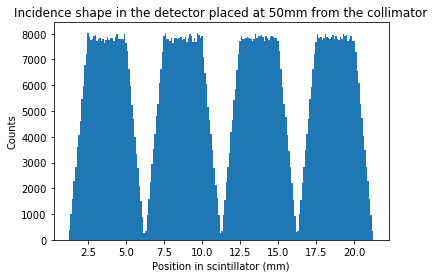

In [28]:
plot(histogram,200,dist_to_det)

1176787


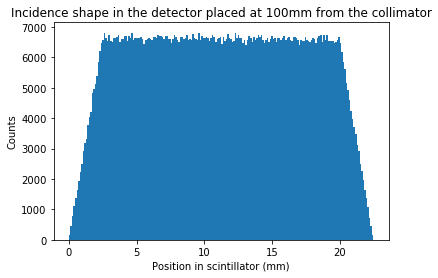

In [31]:
plot(histogram,200,dist_to_det)

1176523


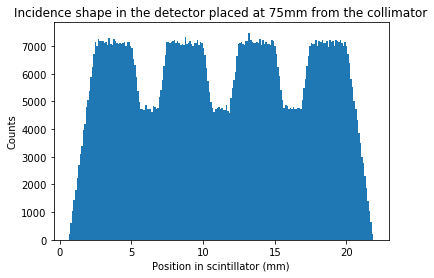

In [34]:
plot(histogram,200,dist_to_det)

1175880


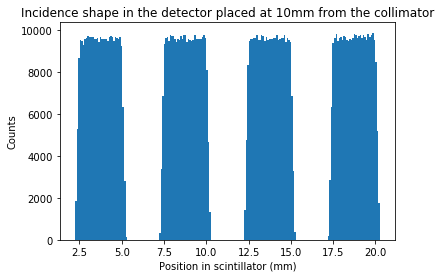

In [25]:
plot(histogram,200,dist_to_det)

1177009


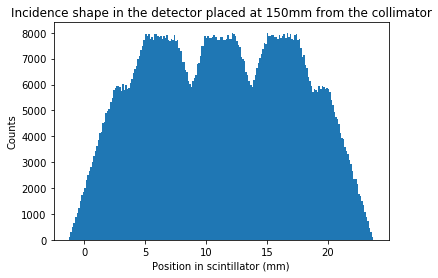

In [37]:
plot(histogram,200,dist_to_det)

1177157


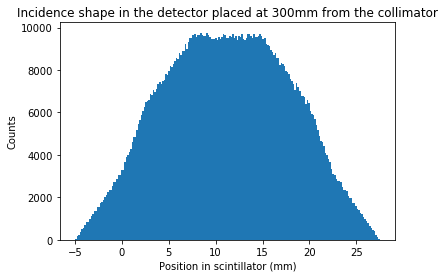

In [40]:
plot(histogram,200,dist_to_det)

1175795


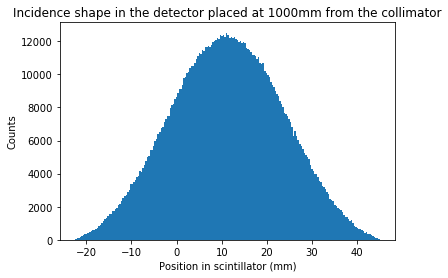

In [43]:
plot(histogram,200,dist_to_det)

1178672


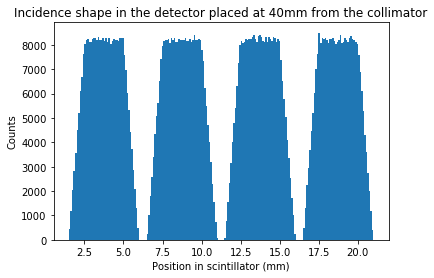

In [46]:
plot(histogram,200,dist_to_det)